# Connect to G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Install required Library

In [2]:
!pip install pythainlp
!pip install epitran
!pip install pyLDAvis

# !pip install pyLDAvis==2.1.2 // Old version

# Thai font
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

     |████████████████████████████████| 11.0 MB 5.0 MB/s 
     |████████████████████████████████| 743 kB 37.6 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.0 which is incompatible.
     |████████████████████████████████| 138 kB 5.3 MB/s 
     |████████████████████████████████| 72 kB 335 kB/s 
     |████████████████████████████████| 1.2 MB 36.8 MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10767 sha256=16c96889b538e56074022f90583823d751cba8bbe65fc0cb149a5dbfc340bcfa
  Stored in directory: /root/.cache/pip/wheels/1a/f4/8a/a5024f

--2021-07-24 14:53:52--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-07-24 14:53:52--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2021-07-24 14:53:52 (6.72 MB/s) - ‘t

# Import neccessary library and setup Thai font

In [2]:
import pandas as pd
import pythainlp
import matplotlib as mpl
import re
import itertools
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

from collections import Counter

from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from pythainlp.util import normalize

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not 

In [3]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font',family="TH Sarabun New", size=12)

# Import Data

In [22]:
path = "/content/drive/MyDrive/Colab Notebooks/CustomerReviews.csv"
df = pd.read_csv(path)
df.head()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0


# Average score per restaurant

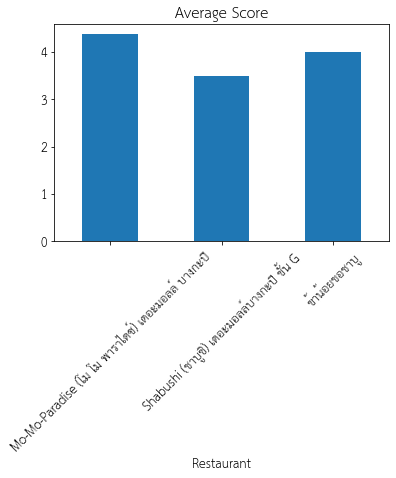

In [5]:
mean_scores = df.groupby(by=["Restaurant"])['Rating'].mean()
mean_scores.plot.bar(x='Restaurant', y='Rating', rot=0, title="Average Score")
plt.xticks(rotation=45)
plt.savefig("mean_score.png")

# Cleanup Text

In [6]:
def cleansing_text(text):
  text = text.strip().lower()

  # Remvoe special character, number, space, dot
  text = re.sub('[\t\n\xa0\"\'!?\/\(\)%\:\=\-\+\*\_ๆ#$&,<>]', '', text)
  text = re.sub('[0-9]', ' ', text)
  text = re.sub('[\.]', ' ', text)
  text = re.sub('\u200b',' ', text)
  text = re.sub('\s+',' ',text)

  return text

<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:5: DeprecationWarning: invalid escape sequence \/
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:9: DeprecationWarning: invalid escape sequence \s
<ipython-input-6-99404091cc12>:5: DeprecationWarning: invalid escape sequence \/
  text = re.sub('[\t\n\xa0\"\'!?\/\(\)%\:\=\-\+\*

In [7]:
def tokenize_sentense(text):
  token_word = word_tokenize(text,engine="newmm")
  return token_word

In [8]:
df['review_clean'] = df['Review'].apply(cleansing_text)
df['heading_clean'] = df['Headline'].apply(cleansing_text)


In [9]:
# Tokenize
df['words'] = df['review_clean'].apply(tokenize_sentense)
print(df.head())


   Review ID  ...                                              words
0          1  ...  [ที่, สำคัญ, ของ, ร้าน, นี้, คือ, บริการ, ดีมา...
1          2  ...  [นึกถึง, ชาบู, ญี่ปุ่น, ยังไง, ก็, ต้อง,  , คิ...
2          3  ...  [มา, ทาน, ช่วงนี้,  , สามารถ, นั่ง, โต๊ะ, เดีย...
3          4  ...  [ถ้า, นึกถึง, ชาบู, ที่, มี, เนื้อ, เน้น,  , ใ...
4          5  ...  [เดิน, มา, หน้า, ร้าน, แล้ว, ได้กลิ่น, ชาบู, ห...

[5 rows x 10 columns]


In [10]:
# Remove stopword
custom_stop_word = ['ร้าน','บาท','ทาน','กิน','นะ','ถ้า', ' ', '  ', '\n', 'ร้าน', 'นะคะ', 'เค้า', 'กก', 'ผม', 'คน']
stop_word = list(pythainlp.corpus.common.thai_stopwords()) + custom_stop_word
df['words'] = df['words'].apply(lambda x : [y for y in x  if y not in stop_word])
print(df.head())

   Review ID  ...                                              words
0          1  ...  [บริการ, ดีมาก, พนักงาน, น่ารัก, สะอาดสะอ้าน, ...
1          2  ...  [นึกถึง, ชาบู, ญี่ปุ่น, คิดถึง, โม, โม่, พาราไ...
2          3  ...  [นั่ง, โต๊ะ, หม้อ, โต๊ะ, ยังมี, ฉาก, กั้น, น้ำ...
3          4  ...  [นึกถึง, ชาบู, เนื้อ, ราคา, โหด, เกินไป, นึกถึ...
4          5  ...  [เดิน, หน้า, ได้กลิ่น, ชาบู, หอ, มมาก, โปร, บั...

[5 rows x 10 columns]


# Top review word for each restaurant

In [11]:
unq_resturant = df.drop_duplicates('Restaurant_ID')['Restaurant']
print(unq_resturant)

0     Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ
8             Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G
16                                        ข้าน้อยขอชาบู
Name: Restaurant, dtype: object


In [12]:
def get_restuant_review_word(unique_resturant):
    resturant_review = dict()
    for resturant in unique_resturant:
        
        token_words = []
        for reviews in df[df['Restaurant'] == resturant]['words']:
            token_words += reviews
            resturant_review[resturant] = token_words
    return resturant_review

In [13]:
review_per_resturant = get_restuant_review_word(unq_resturant)
print(review_per_resturant)

{'Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ': ['บริการ', 'ดีมาก', 'พนักงาน', 'น่ารัก', 'สะอาดสะอ้าน', 'ใส่ใจ', 'ประทับใจ', 'บริการ', 'รสชาติ', 'อาหาร', 'อันนี้', 'แปลก', 'เซ็ท', 'อาหาร', 'จำกัด', 'หลากหลาย', 'พอกับ', 'ความต้องการ', 'เนื้อ', 'สัน', 'คอ', 'ถาด', 'เป็ด', 'แฟน', 'เนื้อ', 'ภาพ', 'ดี', 'น้ำ', 'ซุป', 'ดำ', 'เผ็ด', 'น้ำจิ้ม', 'อร่อย', 'รสชาติ', 'แบบนี้', 'เต้าเจี้ยว', 'เคลม', 'รสชาติ', 'ดี', 'ถาม', 'ราคา', 'โดยรวม', 'คุ้ม', 'โมจิ', 'อร่อย', 'ไอติม', 'อร่อย', 'ไม่ต้อง', 'ข้างนอก', 'สรุป', 'ประทับใจ', 'บริการ', 'คุณภาพ', 'อาหาร', 'นึกถึง', 'ชาบู', 'ญี่ปุ่น', 'คิดถึง', 'โม', 'โม่', 'พาราไดซ์', 'คุณภาพ', 'มาตรา', 'ฐาน', 'มีโอ', 'กา', 'สมาทาน', 'นาที', 'บริการ', 'ดี', 'อาหาร', 'เครื่องดื่ม', 'ที่ทาง', 'ทะยอย', 'แจ้ง', 'รายละเอียด', 'การงด', 'ออร์เดอร์', 'สาขา', 'พนักงานบริการ', 'ดี', 'น่ารัก', 'เป็นกันเอง', 'เหวี่ยง', 'เจอ', 'สาขา', 'พระราม', 'โอเค', 'พนักงาน', 'ทำงาน', 'ctw', 'พรีเมียม', 'บริการ', 'สู้', 'สาขา', 'terminal', 'ลูกค้า', 'นั่ง', 'โต๊ะ', 'หม้อ', 'โต๊ะ', 'ยังมี'

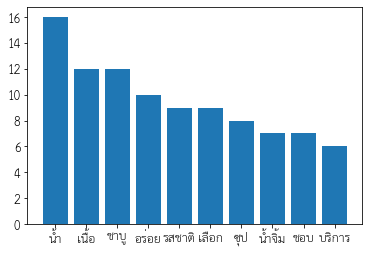

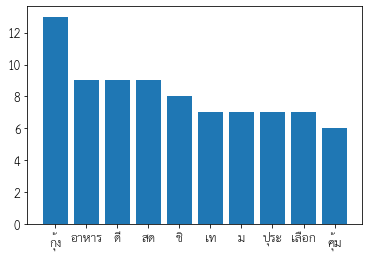

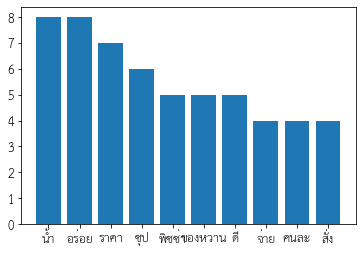

In [14]:
for key, value in review_per_resturant.items():

    counts = Counter(value)     # Count number of word
    dict_counts = dict(counts)
    dict_count_sort = {k: v for k, v in sorted(dict_counts.items(), key=lambda item: item[1], reverse=True)} # Sort by number of counts
    top_10_word = dict(itertools.islice(dict_count_sort.items(), 10))
    
    plt.bar(range(len(top_10_word)), list(top_10_word.values()), align='center')
    plt.title = key
    plt.xticks(range(len(top_10_word)), list(top_10_word.keys()))
    plt.show()
    #plt.savefig(key + ".png")

# Prepare data for LDA Analysis

In [15]:
# Create dictionary
id2word = corpora.Dictionary(df.words.to_list())

In [16]:
# Create Corpus
texts = df.words.to_list()

In [17]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(3, 1), (8, 2), (12, 1), (15, 2), (17, 1), (28, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(4, 1), (6, 5), (7, 3), (13, 8), (14, 2), (17, 1), (20, 3), (21, 1), (22, 1), (26, 4), (32, 3), (33, 2), (42, 2), (48, 3), (49, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (

# LDA Model Trainning

In [19]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 3 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"น้ำ" + 0.013*"ชาบู" + 0.012*"เนื้อ" + 0.011*"เลือก" + 0.010*"สาขา" + '
  '0.010*"ซุป" + 0.009*"ดี" + 0.009*"รสชาติ" + 0.008*"ดีมาก" + 0.008*"อร่อย"'),
 (1,
  '0.016*"อาหาร" + 0.015*"ราคา" + 0.015*"อร่อย" + 0.015*"ดี" + 0.013*"ชาบู" + '
  '0.013*"กุ้ง" + 0.012*"เนื้อ" + 0.011*"น้ำ" + 0.010*"สาขา" + 0.009*"รสชาติ"'),
 (2,
  '0.023*"น้ำ" + 0.017*"เลือก" + 0.015*"ซุป" + 0.015*"อร่อย" + 0.011*"ชอบ" + '
  '0.009*"เนื้อ" + 0.009*"บุฟเฟ่ต์" + 0.009*"ดี" + 0.009*"รสชาติ" + '
  '0.008*"สั่ง"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

# LDA model visualize

In [20]:
# import pyLDAvis.gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
gensimvis.prepare(lda_model, corpus, id2word)



/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x        y  topics  cluster       Freq
topic                                               
1     -0.035854 -0.00742       1        1  63.631172
2      0.032491 -0.00999       2        1  21.786938
0      0.003363  0.01741       3        1  14.581890, topic_info=        Term       Freq      Total Category  logprob  loglift
13       น้ำ  17.000000  17.000000  Default  30.0000  30.0000
132    เลือก  13.000000  13.000000  Default  29.0000  29.0000
6        ซุป  11.000000  11.000000  Default  28.0000  28.0000
87       ชอบ   6.000000   6.000000  Default  27.0000  27.0000
48      ชาบู  14.000000  14.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
117     สั่ง   0.829431   7.521345   Topic3  -5.3617  -0.2794
87       ชอบ   0.784931   6.374056   Topic3  -5.4168  -0.1690
241     กุ้ง   0.816354  10.945327   Topic3  -5.3775  -0.6704
78   ของหวาน   0.755397   6.977542   Topic3  -5.4551  -0.2978
100     นุ่ม   0.714121   5.599056   Topic3  -5.5113  -0.1339

[201 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
43        1  0.546826      ctw
43        3  0.546826      ctw
303       1  0.979101        g
290       1  0.893873      net
291       1  0.794034   กลับมา
...     ...       ...      ...
515       2  0.844202  ได้เวลา
302       1  0.871117     ไลน์
42        1  0.512169    ไอติม
42        2  0.341446    ไอติม
42        3  0.170723    ไอติม

[219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [21]:
print(lda_model)

LdaModel(num_terms=563, num_topics=3, decay=0.5, chunksize=2000)
